# Gráficos con `matplolib`
La semana pasada aprendimos a usar datos tabulares con `pandas`. Cubrimos cómo cargar datos, seleccionar columnas y filas, y calcular algunas estadísticas básicas. Esta semana, aprenderemos a visualizar datos usando la biblioteca `matplotlib` para hacer gráficos.

## Cargando librerías
Para usar una librería en Python, primero debemos importarla. Como hemos visto en ocasiones anteriores para importar una librería, usamos la palabra clave `import` seguida del nombre de la librería, en este caso, `matplotlib`. Pero en lugar de importar la librería entera, vamos a importar un módulo específico de la librería llamado `pyplot`. Este módulo contiene funciones para crear la mayoría de los tipos de gráficos que necesitaremos.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Gráficos desde listas
Podemos crear un gráfico de línea usando la función `plot`. Para crear un gráfico de línea, proporcionamos valores para el eje `x` y el eje `y`. Los valores pueden ser proporcionados como listas.

In [5]:
tiempo = [0, 1, 2, 3, 4, 5]
gusto = [0, 10, 100, 80, 85, 90]

Nota que ambas listas deben tener el mismo número de elementos. Verifiquemos que sea así.

In [16]:
len(tiempo) == len(gusto)

True

Ahora llamos a la función `plot` y pasamos las listas `tiempo` y `gusto` como argumentos que definen a las coordenadas en el eje `x` y `y`, respectivamente.

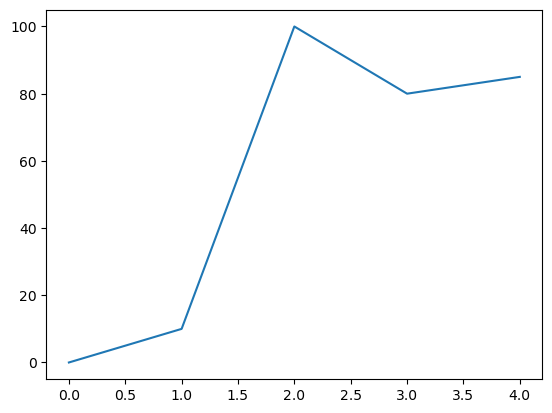

In [17]:
plt.plot(tiempo, gusto)

Ya tenemos un gráfico de línea, pero no es muy informativo. No sabemos qué datos se muestran en el gráfico. Para agregar etiquetas a los ejes `x` y `y`, usamos las funciones `xlabel` e `ylabel`, respectivamente. También podemos agregar un título al gráfico usando la función `title`.

Text(0.5, 1.0, 'Gusto por producto en función del tiempo')

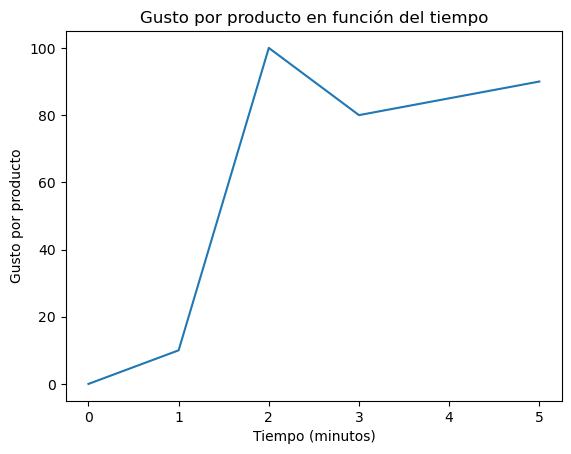

In [6]:
plt.plot(tiempo, gusto)
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Gusto por producto')
plt.title('Gusto por producto en función del tiempo')

## Gráficos desde data frames de `pandas`
Hemos estado trabajando con set de datos con información del producto interno bruto (PIB) per cápita alrededor del mundo. Vamos a usar estos datos para crear gráficos. Primero, carguemos los datos de un archivo CSV en un data frame de `pandas`.

In [7]:
pib_global = pd.read_csv('python-novice-gapminder-data/data/gapminder_all.csv')
pib_global.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


Supongamos que solo queremos comparar al PBI de dos países en particular, Ecuador y Chile. Vamos a filtar nuestros datos y crear un nuevo data frame que contenga solo los datos de estos dos países.

In [12]:
pib_ecuador = pib_global[(pib_global.country == 'Ecuador') | (pib_global.country == 'Chile')]
pib_ecuador

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
56,Americas,Chile,3939.978789,4315.622723,4519.094331,5106.654313,5494.024437,4756.763836,5095.665738,5547.063754,...,7961258.0,8858908.0,9717524.0,10599793.0,11487112.0,12463354.0,13572994.0,14599929.0,15497046,16284741
61,Americas,Ecuador,3522.110717,3780.546651,4086.114078,4579.074215,5280.994710,6679.623260,7213.791267,6481.776993,...,4681707.0,5432424.0,6298651.0,7278866.0,8365850.0,9545158.0,10748394.0,11911819.0,12921234,13755680


Vemos que tenemos dos filas y 38 columnas, pero solo las que comienzan con `gdpPercap` son relevantes para nosotros. Vamos a extraerlas usando la función `contains` sobre los nombres de las columnas.

In [15]:
pib_ecuador.columns[pib_ecuador.columns.str.contains('gdp')]

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')

Otra opción es iterar sobre las columnas y seleccionar solo las que contienen la cadena `gdpPercap`.

In [18]:
col_int = []
for col in pib_ecuador.columns.values:
    if col.startswith('gdp'):
        col_int.append(col)

Aquí mostramos una tercera solución utilizando un bucle en una sola línea de código. Esta solución es más eficiente que la anterior, pero es más difícil de leer. Pero ambas nos dan el mismo resultado.

In [10]:
mi_lista = [col for col in pib_ecuador.columns.values if col.startswith('gdp')]
mi_lista

['gdpPercap_1952',
 'gdpPercap_1957',
 'gdpPercap_1962',
 'gdpPercap_1967',
 'gdpPercap_1972',
 'gdpPercap_1977',
 'gdpPercap_1982',
 'gdpPercap_1987',
 'gdpPercap_1992',
 'gdpPercap_1997',
 'gdpPercap_2002',
 'gdpPercap_2007']

Guardaremos los nombres de los países en una lista para usarlos más adelante.	

In [14]:
paises = pib_ecuador.country
paises

56      Chile
61    Ecuador
Name: country, dtype: object

Ahora podemos extraer las columnas de nuestro interés y crear un nuevo data frame. Vamos también a transponer el data frame para que las columnas aparezcan como filas. Para esto usamos el módulo `T`.

In [18]:
pib_ecuador = pib_ecuador[mi_lista].T
pib_ecuador

,56,61
gdpPercap_1952,3939.978789,3522.110717
gdpPercap_1957,4315.622723,3780.546651
gdpPercap_1962,4519.094331,4086.114078
gdpPercap_1967,5106.654313,4579.074215
gdpPercap_1972,5494.024437,5280.994710
gdpPercap_1977,4756.763836,6679.623260
gdpPercap_1982,5095.665738,7213.791267
gdpPercap_1987,5547.063754,6481.776993
gdpPercap_1992,7596.125964,7103.702595
gdpPercap_1997,10118.053180,7429.455877


Notamos que los nombres de las columnas aparecen como índices. Vamos a etiquetarlos con los nombres de los países a los que representan usando los nombres que extraímos anteriormente.

In [19]:
pib_ecuador.columns = paises.values
pib_ecuador

,Chile,Ecuador
gdpPercap_1952,3939.978789,3522.110717
gdpPercap_1957,4315.622723,3780.546651
gdpPercap_1962,4519.094331,4086.114078
gdpPercap_1967,5106.654313,4579.074215
gdpPercap_1972,5494.024437,5280.994710
gdpPercap_1977,4756.763836,6679.623260
gdpPercap_1982,5095.665738,7213.791267
gdpPercap_1987,5547.063754,6481.776993
gdpPercap_1992,7596.125964,7103.702595
gdpPercap_1997,10118.053180,7429.455877


Notamos que la primera columna no tiene nombre, esto es porque es de hecho el índice del data frame. Podemos verificar esto de la siguiente manera.

In [39]:
pib_ecuador.index

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')

Podemos forzar a que el índice sea una columna usando la función `reset_index`. Nota que usamos `True` como valor para el parámetro `inplace` para que el cambio se haga directamente sobre el data frame.

In [20]:
pib_ecuador.reset_index(inplace = True)

Ahora podemos renombrar esta columna usando la función `rename`.

In [21]:
pib_ecuador.rename(columns = {'index': 'anio'}, inplace=True)

Veamos el resultado

In [22]:
pib_ecuador

,anio,Chile,Ecuador
0,gdpPercap_1952,3939.978789,3522.110717
1,gdpPercap_1957,4315.622723,3780.546651
2,gdpPercap_1962,4519.094331,4086.114078
3,gdpPercap_1967,5106.654313,4579.074215
4,gdpPercap_1972,5494.024437,5280.994710
5,gdpPercap_1977,4756.763836,6679.623260
6,gdpPercap_1982,5095.665738,7213.791267
7,gdpPercap_1987,5547.063754,6481.776993
8,gdpPercap_1992,7596.125964,7103.702595
9,gdpPercap_1997,10118.053180,7429.455877


Ahora vamos a extraer los años de los nombres de estas columnas. Para esto podríamos usar un bucle `for` para iterar sobre los nombres de las columnas y reemplazar `gdpPercap` por `''`.

In [24]:
pib_ecuador['anio'] = pib_ecuador['anio'].str.replace('gdpPercap_', '')

Cambiaremos a los valores de las columnas por números enteros usando la función `astype`.

In [25]:
pib_ecuador['anio'] = pib_ecuador.anio.astype(int)

Verificamos los tipos de datos de las columnas.

In [26]:
pib_ecuador.dtypes

anio         int32
Chile      float64
Ecuador    float64
dtype: object

Ahora tenemos los datos listos para poder graficarlos. Empecemos con un gráfico de líneas. Nota que podemos usar la función `plot` directamente sobre el data frame.

Text(0, 0.5, 'PIB per cápita')

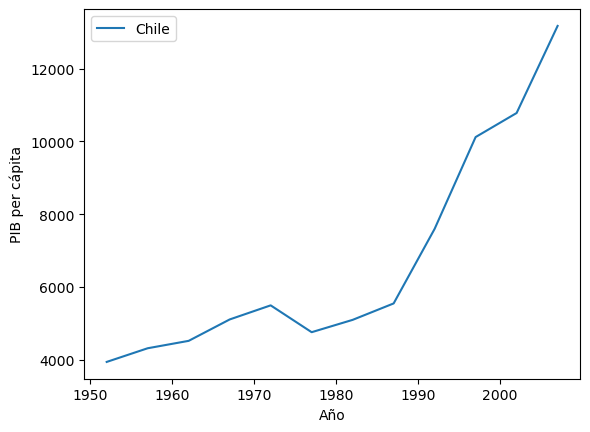

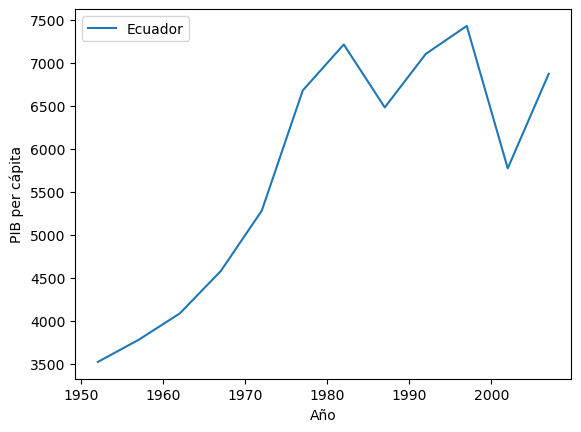

In [27]:
#Creamos una figura para los datos de Chile
pib_ecuador.plot(x = 'anio', y = 'Chile')
#Cambiamos los nombres de los ejes
plt.xlabel('Año')
plt.ylabel('PIB per cápita')
#Ahora hacemos lo mismo para Ecuador
pib_ecuador.plot(x = 'anio', y = 'Ecuador')
plt.xlabel('Año')
plt.ylabel('PIB per cápita')

Pero tenemos dos gráficos. Esto es porque creamos un gráfico cada vez que llamamos a la función `plot` y no le decimos a `matplotlib` que queremos agregar los datos al gráfico anterior. Para esto primero debemos crear una figura único y agregar los datos a esta figura. Para crear una figura usamos la función `figure` y para agregar datos a la figura usamos la función `plot`.

Text(0, 0.5, 'PIB per cápita')

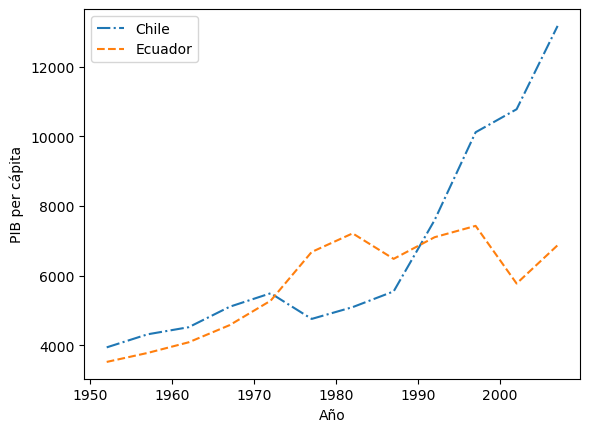

In [28]:
#Creamos una figura (imaginate un lienzo en blanco)
fig = plt.figure()
#Agregamos un eje (un sistema de coordenadas donde graficaremos)
eje = fig.add_subplot(1, 1, 1)
#Ahora graficamos los datos de Chile y Ecuador en el mismo eje
pib_ecuador.plot(x = 'anio', y = 'Chile', ax = eje, linestyle = '-.')
pib_ecuador.plot(x = 'anio', y = 'Ecuador', ax = eje, linestyle = '--')
#Ahora etiquetamos los ejes
plt.xlabel('Año')
plt.ylabel('PIB per cápita')

Nota que ambas figuras usando el mismo eje (`ax` = eje). Esto significa que podemos agregar más datos a la figura usando la función `plot` y estos datos se agregarán al mismo gráfico.  
  
También nota el uso de `linestyle`, el cual nos permite cambiar el estilo de la línea.   
  
Pero si queremos una figura con dos gráficos, podemos hacerlo agregando más ejes a la misma figura. Para esto usaremos la función `add_subplots` que necesita como argumentos el número de filas y columnas de la figura, además del índice del eje que queremos agregar.

Text(0, 0.5, 'PIB per cápita')

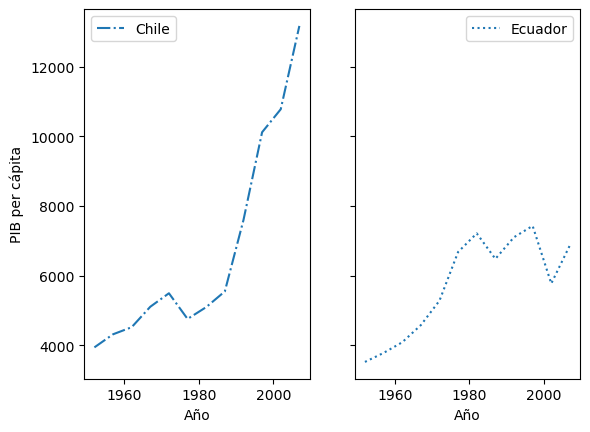

In [30]:
#Inicializamos una figura
fig = plt.figure()
#Agregamos un eje (1 fila, 2 columnas, primer eje)
eje = fig.add_subplot(1, 2, 1)
#Graficamos los datos de Chile en el primer eje
pib_ecuador.plot(x = 'anio', y = 'Chile', ax = eje, ls = '-.')
#Agregamos un segundo eje (1 fila, 2 columnas, segundo eje)
eje2 = fig.add_subplot(1, 2, 2, sharey = eje)
#Graficamos los datos de Ecuador en el segundo eje
pib_ecuador.plot(x = 'anio', y = 'Ecuador', ax = eje2, ls = 'dotted')
#Agregamos etiquetas a los ejes
eje.set_xlabel('Año')
eje2.set_xlabel('Año')
eje.set_ylabel('PIB per cápita')

Nota que al agregar el argumento `sharey = True` a la función `add_subplots` hacemos que ambos ejes (gráficos) compartan el mismo rango en el eje `y`. Esto nos permite comparar los datos de ambos países más fácilmente.  
  
Como puedes notar, la mayor parte de nuestro tiempo la pasamos preparando los datos para poder graficarlos. Esto es normal, ya que los datos no siempre vienen en el formato que necesitamos para graficarlos. Pero abajo vamos a mostrar una manera más sencilla de hacerlo.
  
Para facilitar el proceso vamos a subir los datos de PIB per cápita de Oceanía que incluye solo columnas de PIB y dos países.

In [33]:
#Vamos a usar la columna country como indice del dataframe
datos = pd.read_csv('python-novice-gapminder-data/data/gapminder_gdp_oceania.csv', 
                    index_col = 'country')
datos

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Ahora vamos a remover `gdpPercap` del nombre de las columnas y convertir los años a enteros.

In [34]:
anios = datos.columns.str.replace('gdpPercap_', '')
datos.columns = anios.astype(int)
datos

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Ahora podemos graficar los datos rápidamente. Escojamos los datos de Nueva Zelanda.

<Axes: >

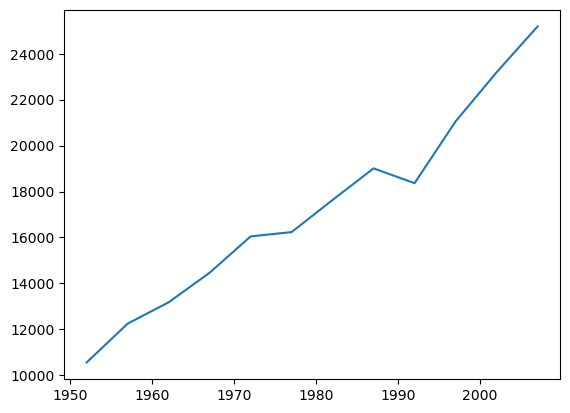

In [20]:
datos.loc['New Zealand'].plot()

Pero ahora queremos comparar los datos de Nueva Zelanda y Australia. Ya que nuestro data frame tiene los países y los años como índices, podemos graficar todo de manera muy rápida.  
  
Solo debemos asegurarnos que los años aparezcan como filas, para esto usamos la función `T`. Abajo mostramos como se ven los datos transpuestos.

In [ ]:
datos.T

country,Australia,New Zealand
1952,10039.59564,10556.57566
1957,10949.64959,12247.39532
1962,12217.22686,13175.67800
1967,14526.12465,14463.91893
1972,16788.62948,16046.03728
1977,18334.19751,16233.71770
1982,19477.00928,17632.41040
1987,21888.88903,19007.19129
1992,23424.76683,18363.32494
1997,26997.93657,21050.41377


<Axes: >

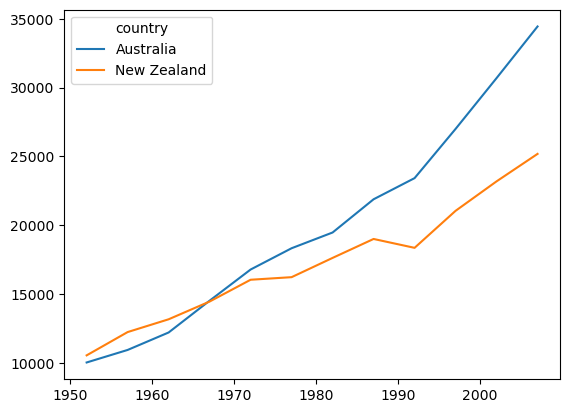

In [36]:
datos.T.plot()

Si no transponemos el data frame, obtendremos un gráfico con los años en el eje `x` y los países en el eje `y`.

<Axes: xlabel='country'>

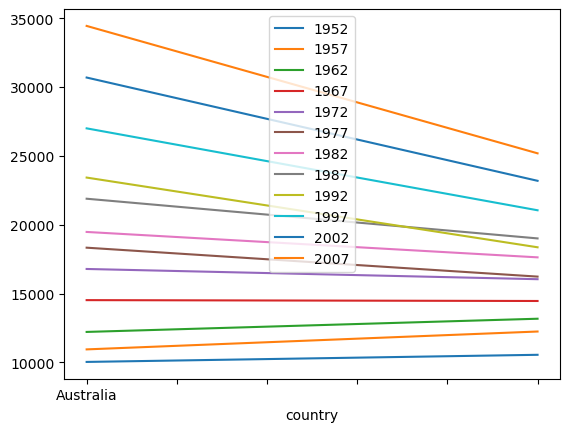

In [37]:
datos.plot()

Esto es definitivamente no es lo que queremos.  
  
Pero regresando al gráfico de ambos países, podemos agregar etiquetas en el gráfico usando la función `text`. Abajo vamos a incluir el valor de PIB per cápita de Nueva Zelanda en el año 1992.  
  
La función `text` necesita como argumentos las coordenadas `x` y `y` del texto que queremos agregar y el texto en sí.

Text(1988, 17363.32494, '18363.32')

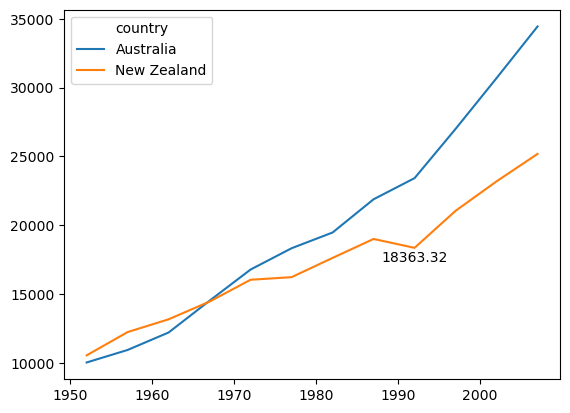

In [38]:
#Graficamos como lo hicimos arriba
datos.T.plot()
#Agregamos la posicion del texto y luego el texto (o numero) que queremos mostrar
plt.text(1988, datos.loc['New Zealand'].loc[1992]-1000, 
         round(datos.loc['New Zealand'].loc[1992], 2), fontsize = 10)
#Podemos guardar la figura en un archivo
plt.savefig('mi_figura.tiff')

Recuerda, si quieres redondear un número, puedes usar la función `round`. Esta función necesita como argumentos el número que queremos redondear y el número de decimales que queremos que tenga el resultado.

In [57]:
round(datos.loc['New Zealand'].loc[1992], 2)

18363.32

Podemos también crear otro tipo de gráficos. Por ejemplo, un gráfico de barras. Para esto usamos el valor `bar` en el parámetro `kind`. 

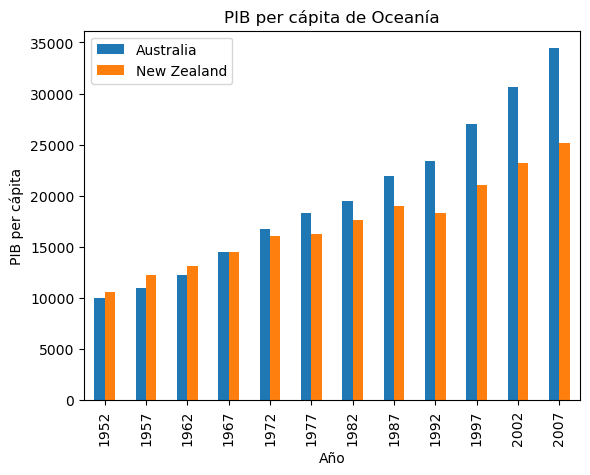

In [39]:
#Grafico de barras
datos.T.plot(kind = 'bar')
#Etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('PIB per cápita')
#Titulo del grafico
plt.title('PIB per cápita de Oceanía')
#Posicion de la leyenda
plt.legend(loc = 'best')

También podemos un gráfico de puntos usando la función `scatter`. Esta función necesita como argumentos los valores para los ejes `x` y `y`. En este caso vamos a darle valores de PIB per cápita de Nueva Zelanda para el eje `x` y de Australia para el eje `y`.

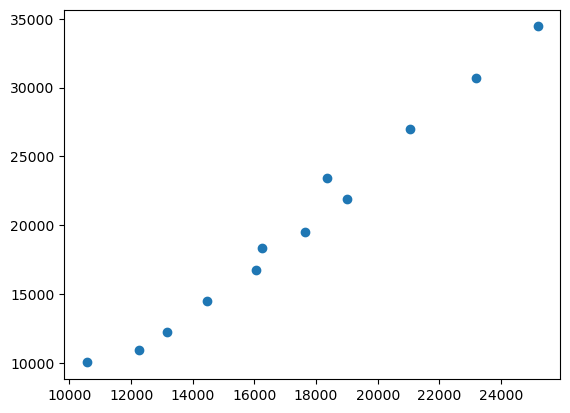

In [40]:
plt.scatter(datos.loc['New Zealand'], datos.loc['Australia'])

Si creamos una figura primero, podemos agregar una línea que conecte nuestro gráfico de puntos.

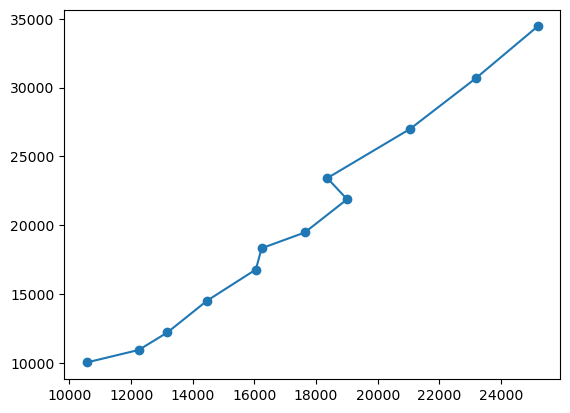

In [42]:
fig = plt.figure()
eje = fig.add_subplot(1, 1, 1)
eje.scatter(datos.loc['New Zealand'], datos.loc['Australia'])
eje.plot(datos.loc['New Zealand'], datos.loc['Australia'])

La librería `matplotlib` tiene muchas más funciones para crear gráficos. Puedes encontrar más información en la documentación oficial de la librería, la cual está disponible en el siguiente enlace: [https://matplotlib.org/](https://matplotlib.org/) (solo en inglés). Las alentamos a que aprendan más sobre esta librería y a que la usen para crear gráficos de sus datos.